In [73]:
'''
next()는 두가지 포맷으로 사용된다.
function 구조로 사용되면 header 만 리턴한다.
consumer 구조로 사용되면 data 에서 header 를 제거한다.

row[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. 
data : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.
단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.
data : [] = None
def save_highest_temperature(self):
    data = list()
그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.
data : [] =list()
'''

'\nnext()는 두가지 포맷으로 사용된다.\nfunction 구조로 사용되면 header 만 리턴한다.\nconsumer 구조로 사용되면 data 에서 header 를 제거한다.\n\nrow[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. \ndata : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.\n단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.\ndata : [] = None\ndef save_highest_temperature(self):\n    data = list()\n그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.\ndata : [] =list()\n'

In [96]:
import csv
import matplotlib.pyplot as plt
import random

In [97]:
data = csv.reader(open('data/seoul.csv', 'rt', encoding='UTF-8'))

In [98]:
next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [99]:
ls = list(data)

In [100]:
print([i for i in ls])

[['1907-10-01', '108', '13.5', '7.9', '20.7'], ['1907-10-02', '108', '16.2', '7.9', '22'], ['1907-10-03', '108', '16.2', '13.1', '21.3'], ['1907-10-04', '108', '16.5', '11.2', '22'], ['1907-10-05', '108', '17.6', '10.9', '25.4'], ['1907-10-06', '108', '13', '11.2', '21.3'], ['1907-10-07', '108', '11.3', '6.3', '16.1'], ['1907-10-08', '108', '8.9', '3.9', '14.9'], ['1907-10-09', '108', '11.6', '3.8', '21.1'], ['1907-10-10', '108', '14.2', '6.4', '24.1'], ['1907-10-11', '108', '15.4', '10.1', '20.4'], ['1907-10-12', '108', '13.9', '11.1', '17.4'], ['1907-10-13', '108', '13.8', '8.3', '21.3'], ['1907-10-14', '108', '13', '6.1', '20.6'], ['1907-10-15', '108', '13.1', '5.7', '20.9'], ['1907-10-16', '108', '14.1', '8.2', '20.2'], ['1907-10-17', '108', '16.4', '10.3', '21.6'], ['1907-10-18', '108', '14.3', '9.8', '20.9'], ['1907-10-19', '108', '13.9', '6.7', '21.3'], ['1907-10-20', '108', '18.3', '12.4', '22.7'], ['1907-10-21', '108', '15.2', '10.7', '19.9'], ['1907-10-22', '108', '15.4', '12

In [101]:
print([i[-1] for i in ls]) # show_highest_temperature

['20.7', '22', '21.3', '22', '25.4', '21.3', '16.1', '14.9', '21.1', '24.1', '20.4', '17.4', '21.3', '20.6', '20.9', '20.2', '21.6', '20.9', '21.3', '22.7', '19.9', '19.6', '16.3', '17.1', '18.7', '18.2', '20.7', '19.6', '20', '20.1', '20.3', '21.3', '21.1', '11.1', '13.6', '17', '18.1', '12.4', '9.4', '11.9', '13.2', '13.4', '14.9', '16.4', '15.2', '17.6', '12.6', '11.7', '6.7', '4.3', '7.1', '6.2', '11.2', '9.9', '5.9', '-0.7', '1.5', '1.9', '2', '2.9', '-2.4', '1.4', '3.4', '6.1', '1.3', '2.6', '5.8', '1.9', '6.6', '8.1', '4.3', '0.6', '3.8', '9', '6.4', '-5.1', '-2.4', '-2.1', '-0.4', '-0.2', '1.9', '-8.1', '-10.2', '-9.4', '0.9', '6.8', '6.4', '-0.7', '-1.9', '-4.4', '-6.1', '-2.1', '-1.3', '-3', '-2.9', '-1.7', '-0.1', '2.9', '-1.2', '-0.9', '2', '3.3', '4.8', '4.5', '4.7', '0.1', '0.9', '-4.5', '-3.6', '2.8', '2.8', '2.3', '-6.1', '-5.1', '-2.7', '0.1', '0.3', '-0.6', '0', '-1.3', '0.8', '0.8', '6.2', '1.6', '-0.2', '-5.4', '-4.1', '-5.5', '-5.7', '-3.7', '1.3', '-4.1', '-2.5', 

In [102]:
highest_temperature = []
[highest_temperature.append(float(i[-1])) for i in ls if i[-1] != '']
print(f'총 {len(highest_temperature)}개')

총 39463개


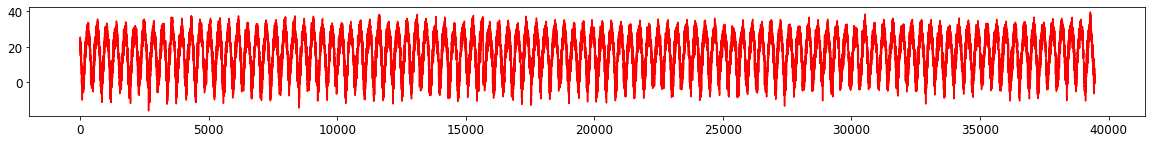

In [103]:
plt.figure(figsize=(20, 2))
plt.plot(highest_temperature, 'r')

In [104]:
high = [] # 최고기온
low = [] # 최저기온

In [105]:
for i in ls:
    if i[-1] != '' and i[-2] != '':
        if 1983 <= int(i[0].split('-')[0]):
            if i[0].split('-')[1] == '02' and i[0].split('-')[2] == '14':
                high.append(float(i[-1]))
                low.append(float(i[-2]))

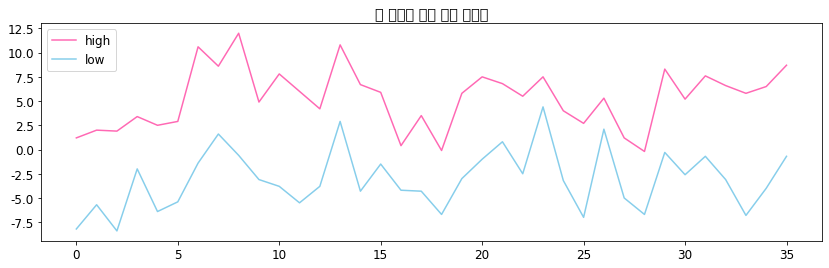

In [106]:
plt.rc('font')
plt.rcParams['axes.unicode_minus'] = False
plt.title('내 생일의 기온 변화 그래프')
plt.plot(high, 'hotpink', label='high')
plt.plot(low, 'skyblue', label='low')
plt.legend()

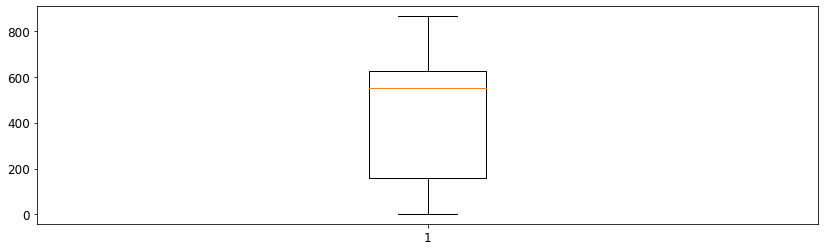

In [107]:
arr = []
[arr.append(random.randint(1, 1000))for i in range(13)]
plt.boxplot(arr)
plt.show()

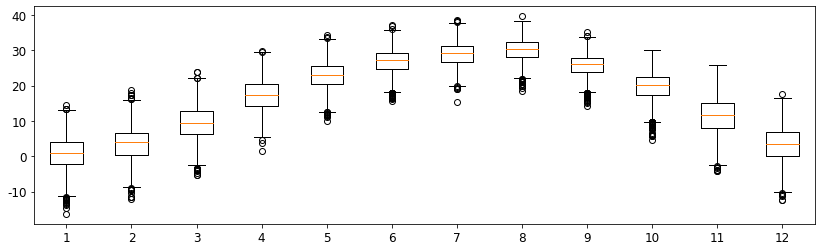

In [110]:
month = [[], [], [], [], [], [], [], [], [], [], [], []]
[month[int(i[0].split('-')[1]) - 1].append(float(i[-1])) for i in ls if i[-1] != '']
plt.boxplot(month)
plt.show()

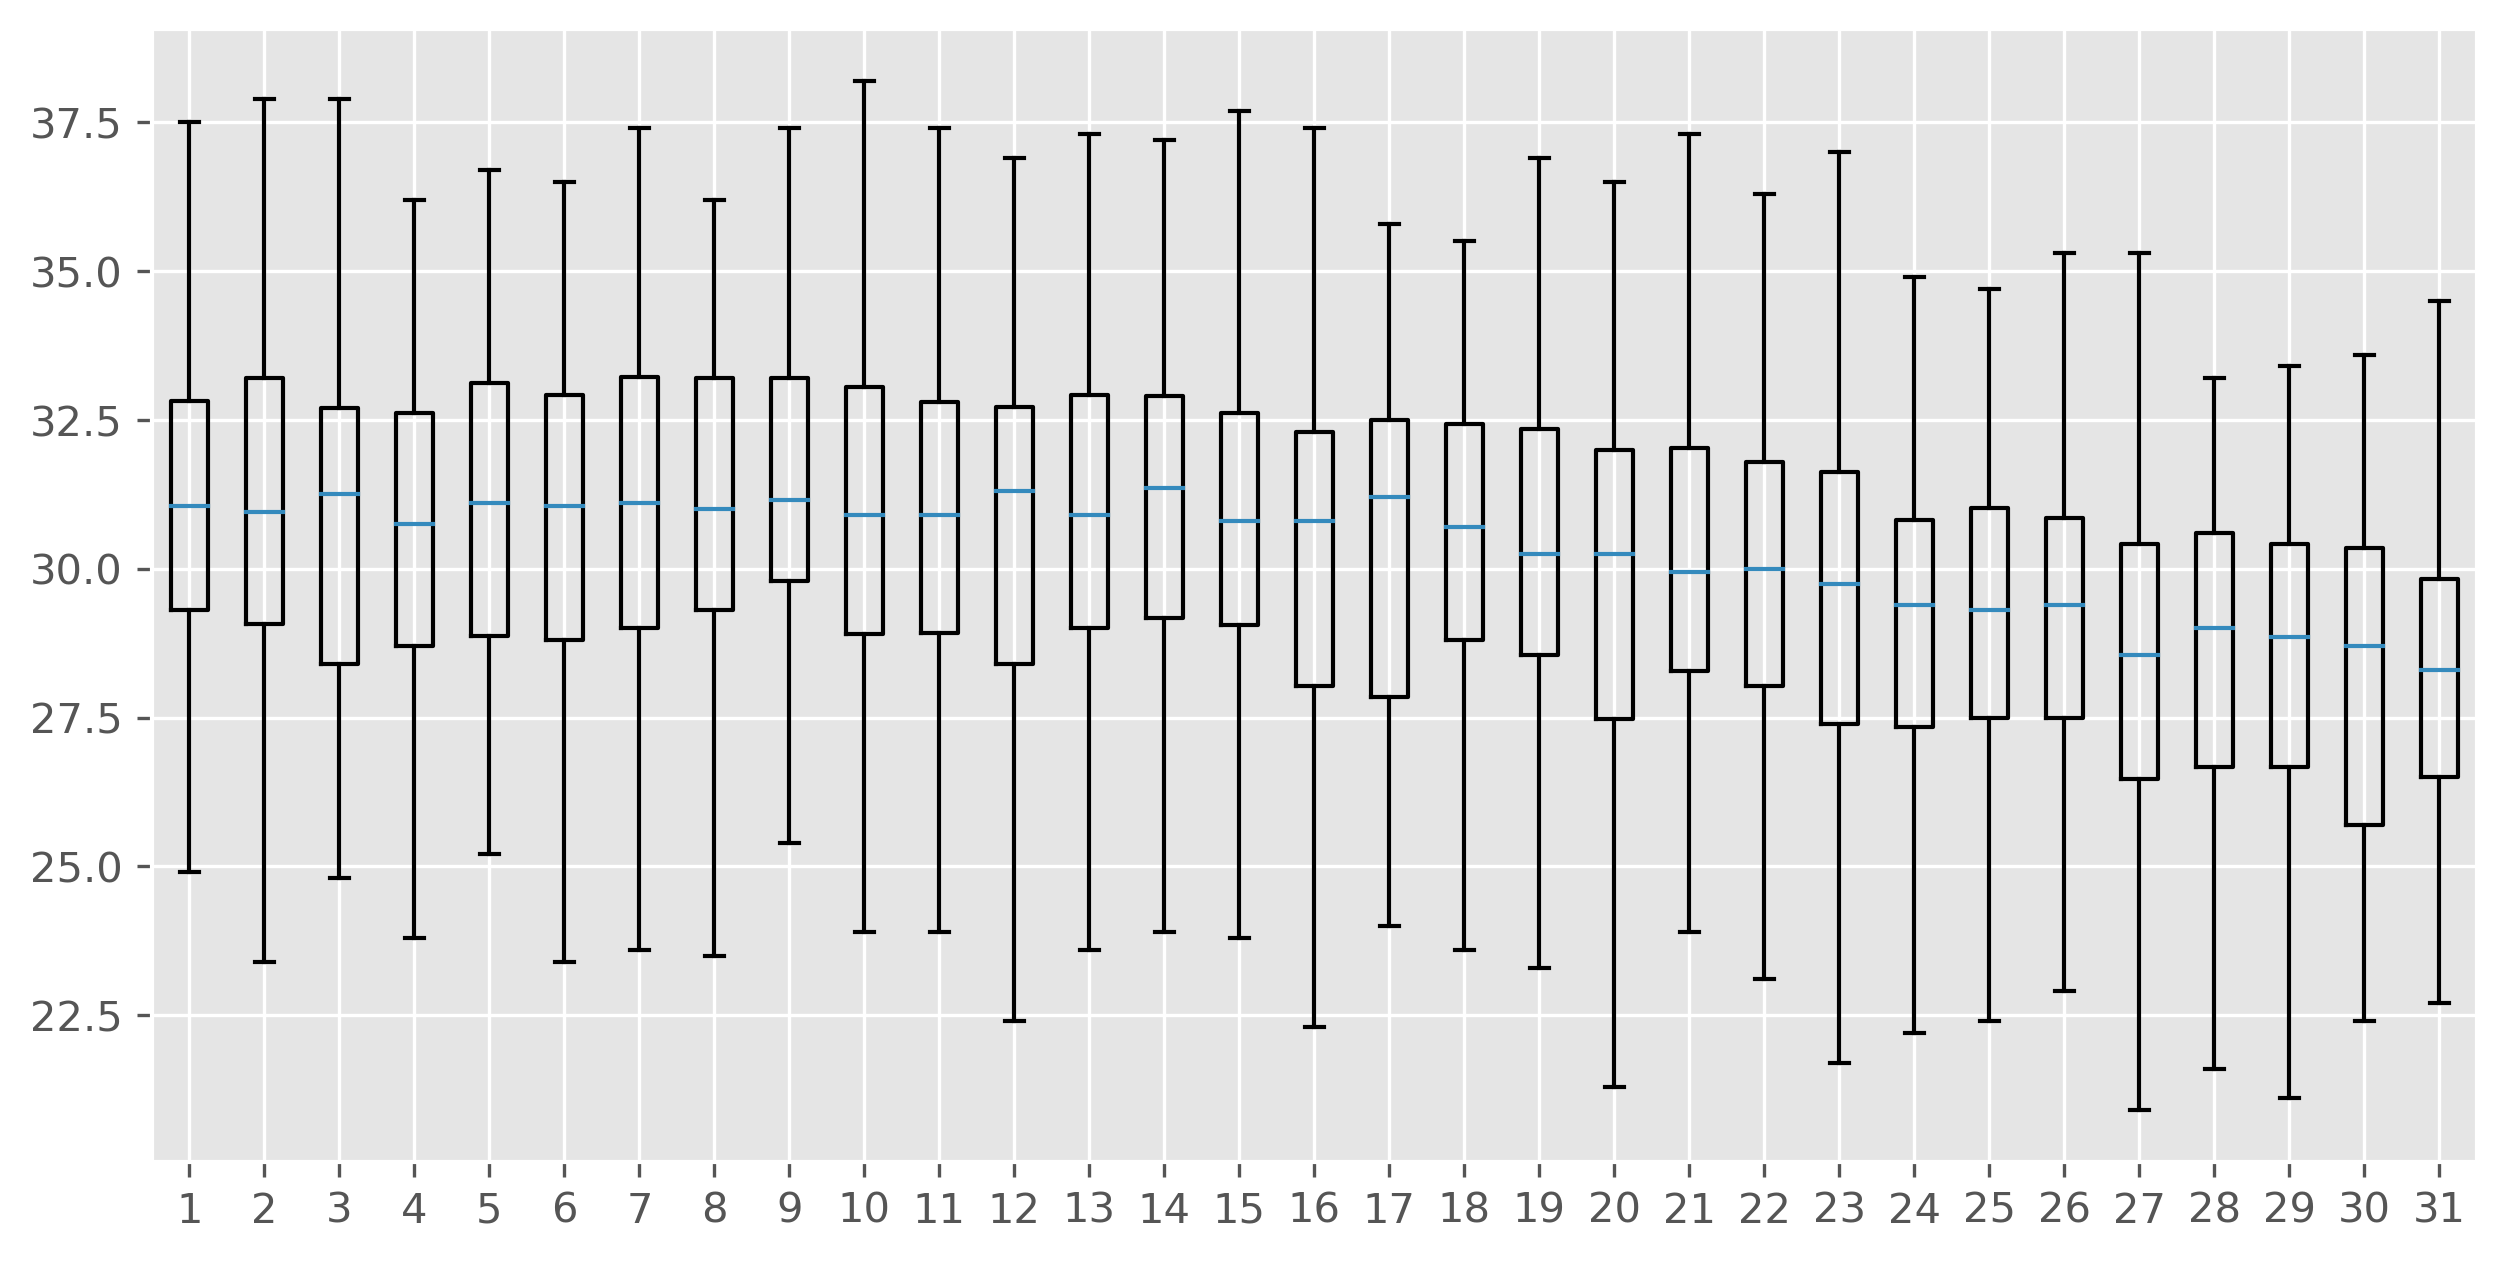

In [113]:
day = []
[day.append([]) for i in range(31)]
[day[int(i[0].split('-')[2]) -1].append(float(i[-1]))
     for i in ls
        if i[-1] != ''
            if i[0].split('-')[1] == '08']
plt.style.use('ggplot') # Graph Style
plt.figure(figsize=(10, 5), dpi=300) # Graph Size
plt.boxplot(day, showfliers=False) # Omit Outlier
plt.show()